In [2]:
import pandas as pd

df = pd.read_stata('text_example_final.dta')

journal1 = df[df['source']==u'管理世界']
journal2 = df[df['source']==u'经济研究']

df.head()

,title,author,organ,source,keyword,summary,fund,year,id
0,2019中国信息经济学乌家培奖评选公告,,中国信息经济学会;,经济研究,,"为促进中国信息经济与信息管理领域的青年学者产生影响未来30年世界理论发展的创新成果,中国信息...",,2019.0,1.0
1,债务高企、风险集聚与体制变革——对发展型政府的反思与超越,张晓晶;刘学良;王佳;,中国社会科学院经济研究所中国宏观经济稳定课题组;,经济研究,宏观杠杆率;;债务风险;;发展型政府;;体制变革,"本文通过分析中国债务的形成机制,指出体制性因素是债务高企的根本原因。这一体制性因素可概括为国...",,2019.0,2.0
2,自然利率与中国宏观政策选择,徐忠;贾彦东;,中国人民银行;,经济研究,自然利率;;潜在产出;;全要素生产率;;宏观政策,"本文讨论的核心是如何准确认识和理解自然利率,并尝试建立以自然利率为基础的宏观经济分析和政策决...",,2019.0,3.0
3,中国国有企业的独特作用:基于知识溢出的视角,叶静怡;林佳;张鹏飞;曹思未;,北京大学经济学院;中欧国际工商学院;北京师范大学经济与管理学院;,经济研究,知识溢出;;基础研究;;市场失灵;;国有企业,国有企业是政府解决市场失灵的工具。本文从知识溢出角度研究中国国有企业的作用。基于上市企业样本...,,2019.0,4.0
4,国有资本划转养老保险基金与劳动力长期供给,景鹏;郑伟;,西南财经大学保险学院;北京大学经济学院;,经济研究,国有资本;;养老保险;;划转率;;劳动力供给,国有资本划转养老保险基金通过“挤占公共财政收入”和“放松个人预算约束”两条路径影响劳动力供给...,,2019.0,5.0


In [8]:
def get_keywords(df):
    dic = {}

    for keywords in df['keyword']:
        keywords = keywords.split(';;')
        for keyword in keywords:
            if(keyword == ""):
                continue
            if keyword not in dic:
                dic[keyword] = 0

            dic[keyword] = dic[keyword] + 1

    lis = []
    for keyword in dic.keys():
        lis.append((dic[keyword], keyword))

    lis = sorted(lis)
    lis.reverse()
    return dic, lis

d2017, l2017 = get_keywords(df[df['year']==2017])
d2018, l2018 = get_keywords(df[df['year']==2018])
d2019, l2019 = get_keywords(df[df['year']==2019])


keyword_dic = {}
for _,keyword in get_keywords(df)[1][0:10]:
    keyword_dic[keyword] = 0

# first = 5

# for _,keyword in l2017[0:first]:
#     keyword_dic[keyword] = 0

# for _,keyword in l2018[0:first]:
#     keyword_dic[keyword] = 0
    
# for _,keyword in l2019[0:first]:
#     keyword_dic[keyword] = 0
    

pd.DataFrame(l2017).head()

,0,1
0,12,经济增长
1,5,政策建议
2,5,创新
3,5,供给侧结构性改革
4,4,融资约束


In [10]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np

plt.rcParams['font.family']='sans-serif' 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

dpi = 200
fig = plt.figure(figsize=(1600/dpi, 1600/dpi), dpi=dpi)

for keyword in keyword_dic.keys():
    x = [2017, 2018, 2019]
    print(keyword)
    y = [d2017.get(keyword) or 0,d2018.get(keyword) or 0, d2019.get(keyword) or 0]
    plt.plot(x,y, label=keyword)


plt.legend(loc=[1.1, 0])
plt.xticks([2017, 2018, 2019])
plt.yticks(np.arange(0, 16, 1))
    
plt.savefig('p3_1a.png', figsize=(1600/dpi, 1600/dpi), dpi=dpi)
fig.set_facecolor("#FFFFFF")

print(journal1['year'].min(), journal1['year'].max())
print(journal2['year'].min(), journal2['year'].max())

经济增长
供给侧结构性改革
国有企业
创新
全要素生产率
融资约束
收入分配
公司治理
人力资本
货币政策
2017.0 2019.0
2017.0 2019.0


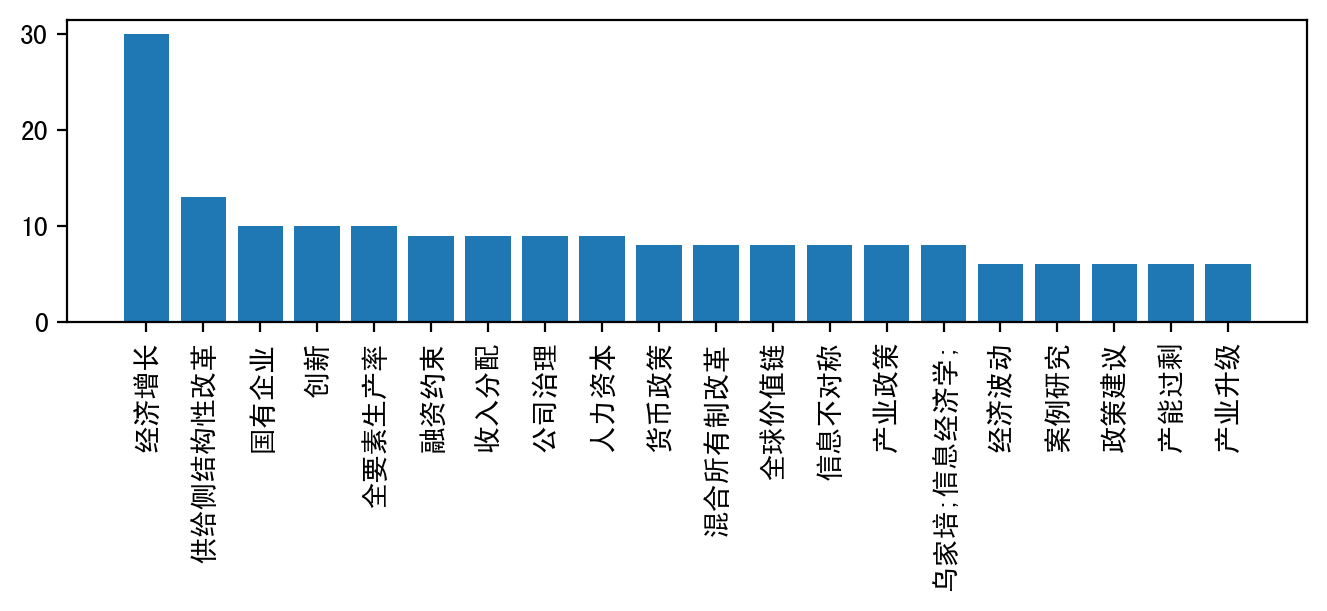

In [15]:
data = get_keywords(df)[1][:20]
dpi = 200
fig = plt.figure(figsize=(1600/dpi, 400/dpi), dpi=dpi)
plt.xticks(rotation=90)
plt.bar([d[1] for d in data],[d[0] for d in data])
fig.set_facecolor("#FFFFFF")